# Intro

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('filepath.csv')

X = data.copy()
y = X.pop("Price")

feature_columns = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = data[feature_columns]
y = data.SalePrice

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

# Data Visualization

In [ ]:

museum_data = pd.read_csv(museum_filepath, index_col="Date",parse_dates=True)

museum_data.head()
museum_data.tail()

plt.figure(figsize=(12,6))

plt.title("Monthly Visitors to Avila Adobe")


plt.xlabel("Date")

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False) # linear correlation

sns.lineplot(data=museum_data['Avila Adobe']) "all data"
sns.barplot(x=flight_data.index, y=flight_data['NK']) "X and Y"
sns.heatmap(data=flight_data, annot=True) "all data"

#housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker']), hue: yes/no
Scatter with Regression:
- sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_data)
Categorical Scatter Plot:
- sns.swarmplot(x=insurance_data['smoker'], y=insurance_data['charges'])

sns.histplot(iris_data['Petal Length (cm)'])
sns.kdeplot(data=iris_data['Petal Length (cm)'], shade=True), smooth histogram
# 2D KDE plot
sns.jointplot(x=iris_data['Petal Length (cm)'], y=iris_data['Sepal Width (cm)'], kind="kde")

# Histograms for each species
sns.histplot(data=iris_data, x='Petal Length (cm)', hue='Species'), hue: splits the data

# KDE plots for each species
sns.kdeplot(data=iris_data, x='Petal Length (cm)', hue='Species', shade=True)

sns.set_style("dark")

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

# Exploratory Datra Analaysis

### Scaling

Scaling just changes the range of your data

In [ ]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)

# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

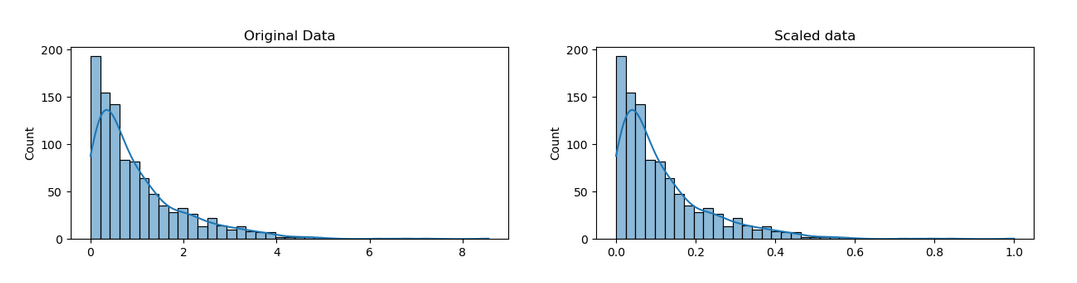

### Normalization

In [ ]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

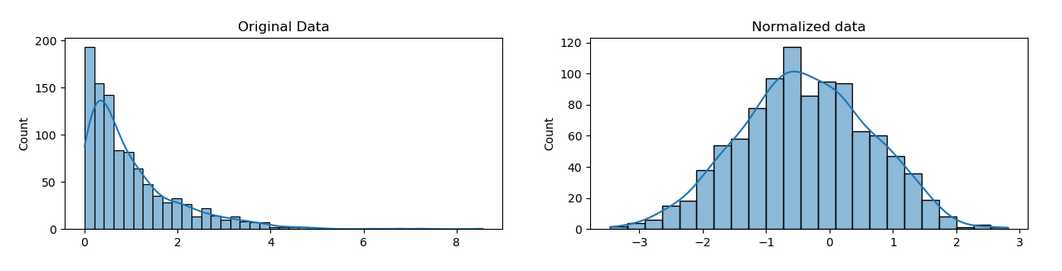

In [ ]:
# get the index of all positive pledges (Box-Cox only takes positive values)
index_of_positive_pledges = kickstarters_2017.usd_pledged_real > 0

# get only positive pledges (using their indexes)
positive_pledges = kickstarters_2017.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = pd.Series(stats.boxcox(positive_pledges)[0],
                               name='usd_pledged_real', index=positive_pledges.index)

### Parsing Dates

MM/DD/YYYY -> YYYY-MM-DD

In [ ]:
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format="%m/%d/%Y")

### Feature Engineering

In [ ]:
X["FCRatio"] = X["FineAggregate"] / X["CoarseAggregate"]
X["AggCmtRatio"] = (X["CoarseAggregate"] + X["FineAggregate"]) / X["Cement"]
X["WtrCmtRatio"] = X["Water"] / X["Cement"]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

# Load data
df = pd.read_csv("../input/fe-course-data/ames.csv")

# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [ ]:
features = ["YearBuilt", "MoSold", "ScreenPorch"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=df.melt(id_vars="SalePrice", value_vars=features),
    facet_kws=dict(sharex=False),
);

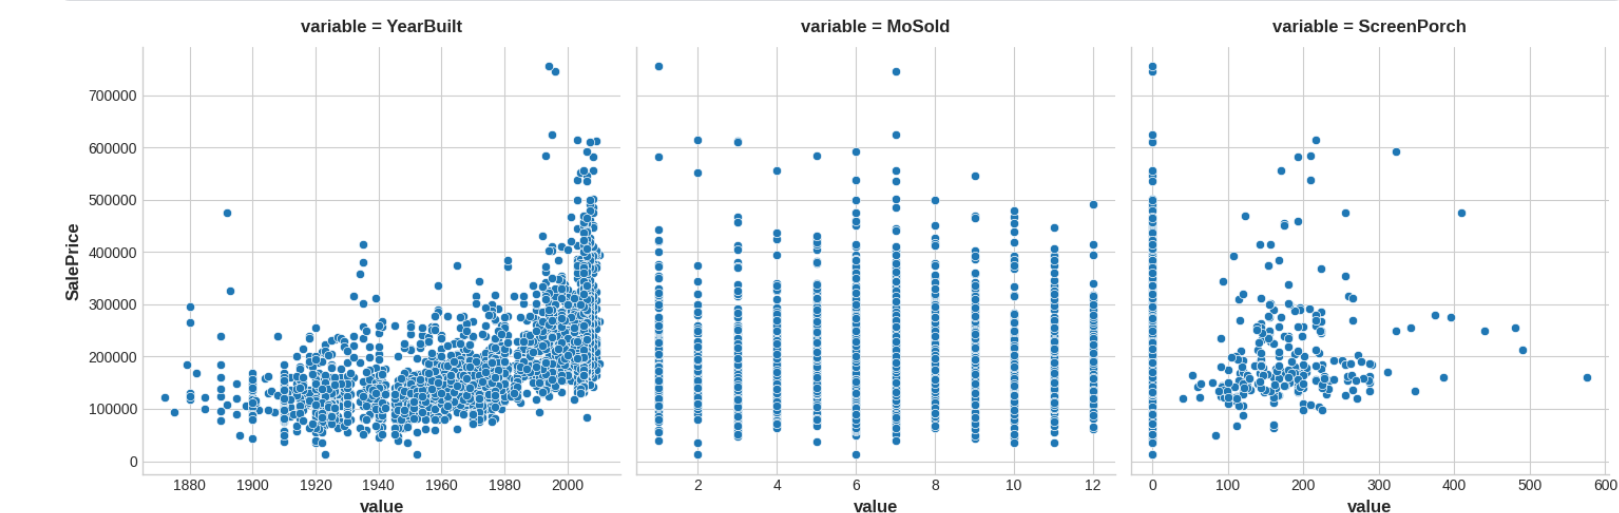

In [ ]:
X = df.copy()
y = X.pop('SalePrice')

mi_scores = make_mi_scores(X, y)

In [ ]:
print(mi_scores.head(20))
# print(mi_scores.tail(20))  # uncomment to see bottom 20

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))
# plot_mi_scores(mi_scores.tail(20))  # uncomment to see bottom 20

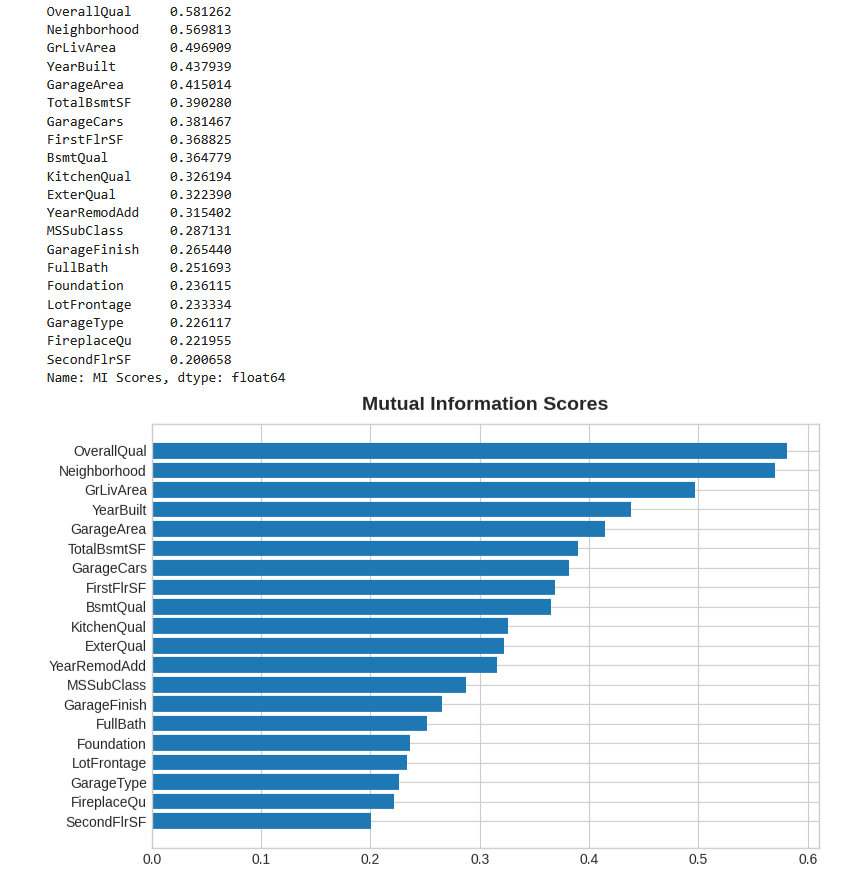

In [ ]:
sns.catplot(x="BldgType", y="SalePrice", data=df, kind="boxen");

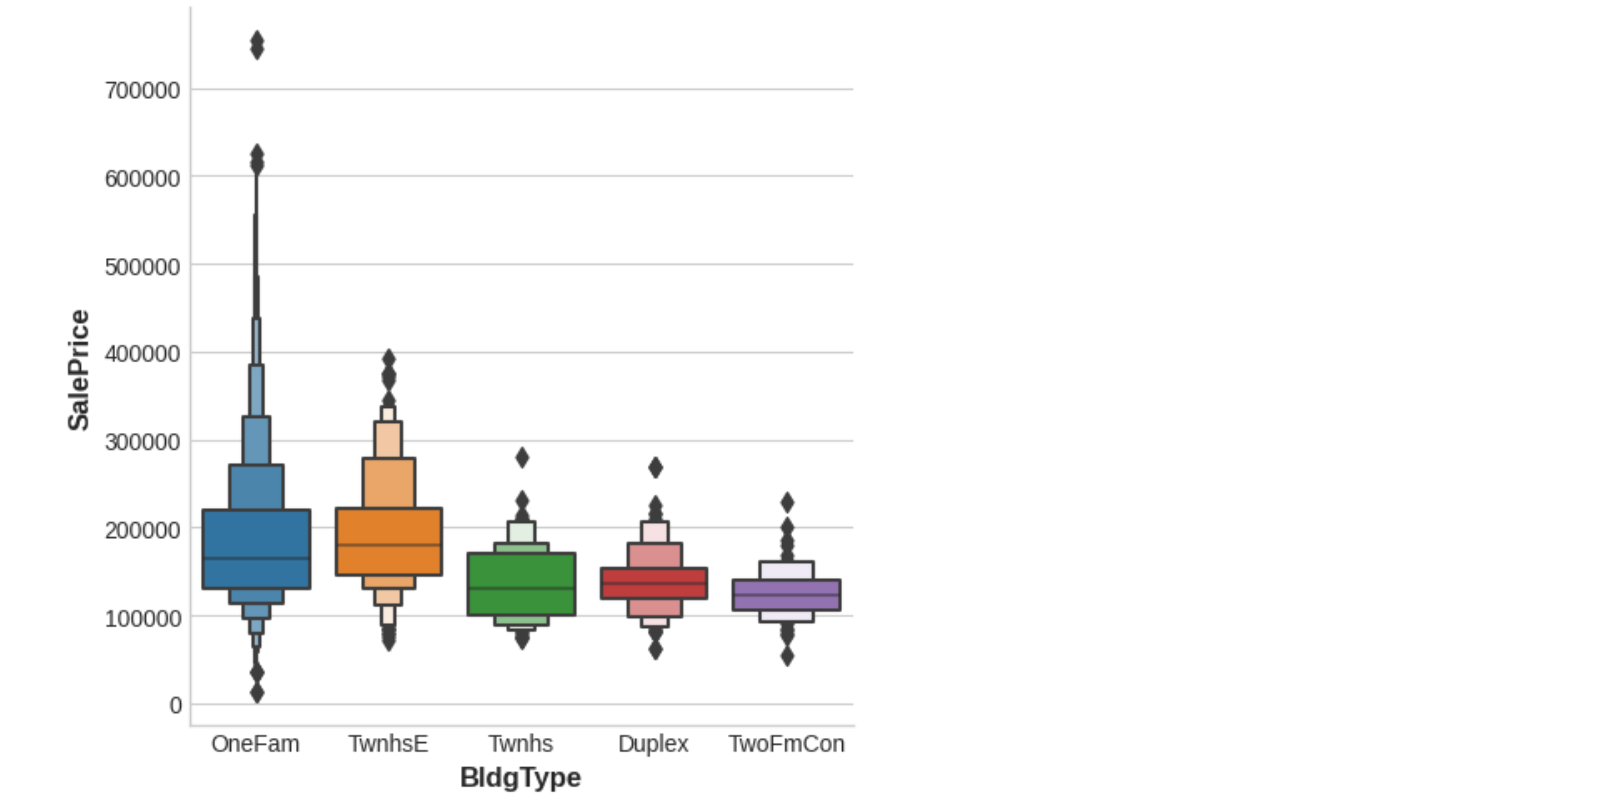

In [ ]:
feature = "GrLivArea"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);
sns.lmplot(x="GrLivArea", y="SalePrice", hue="BldgType", data=insurance_data, scatter_kws={"edgecolor": 'w'}
           # , col="BldgType" # default: all in on graph, this spilts them
           )

![image.png](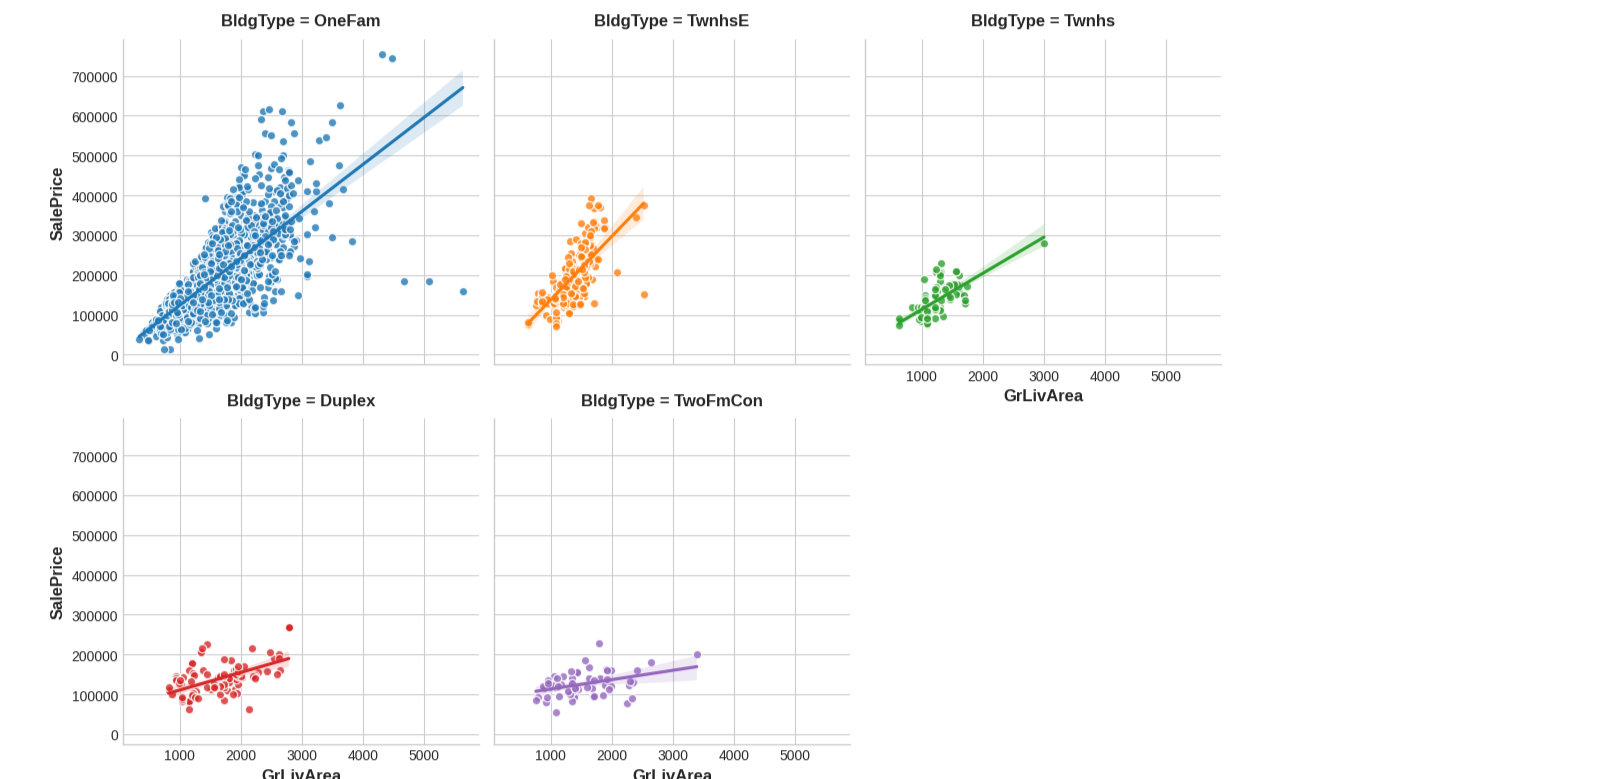![image.png](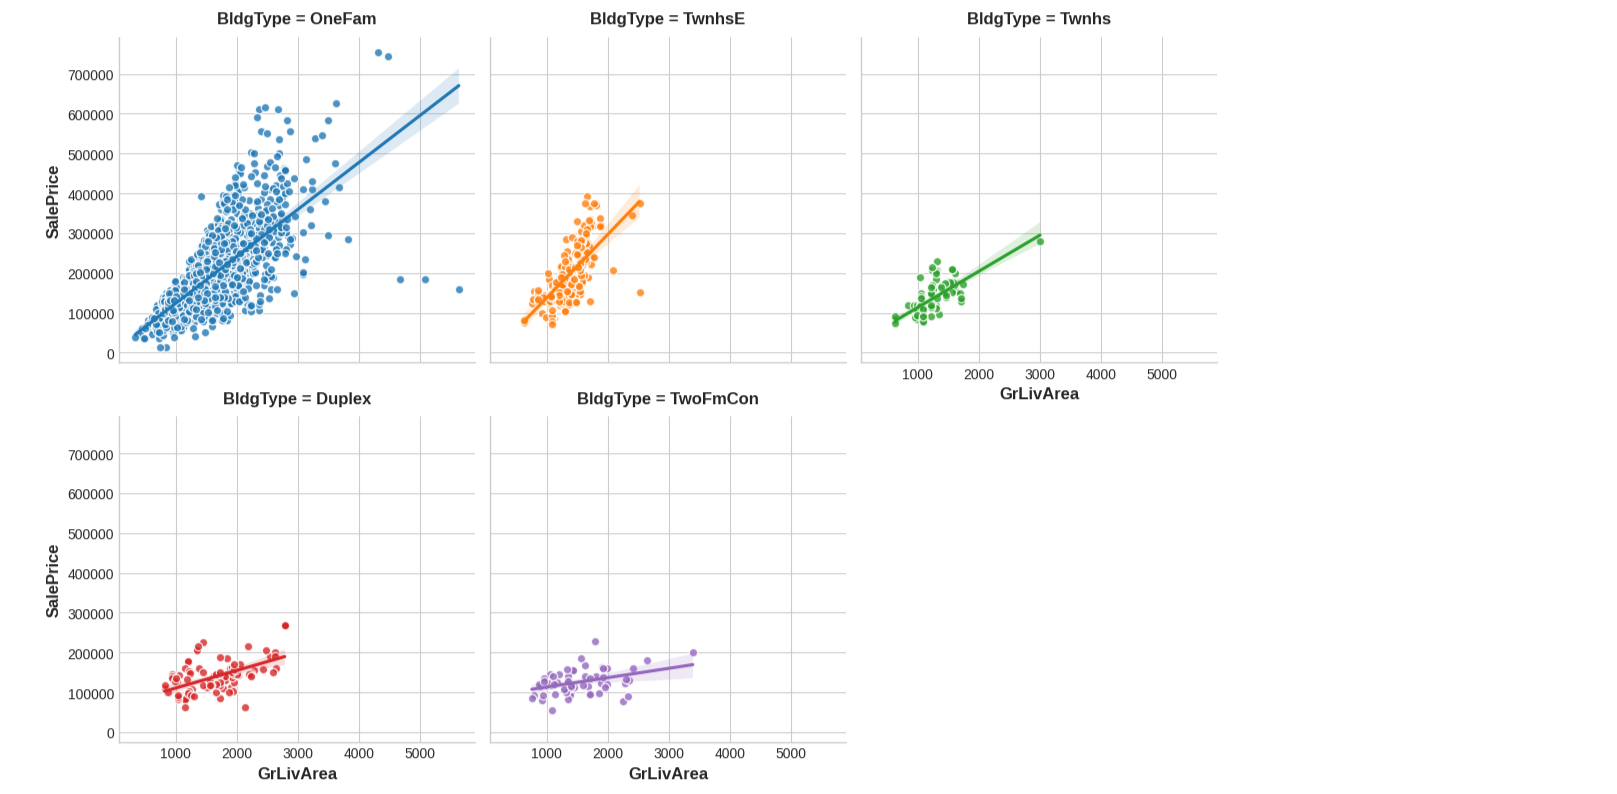![image.png]()))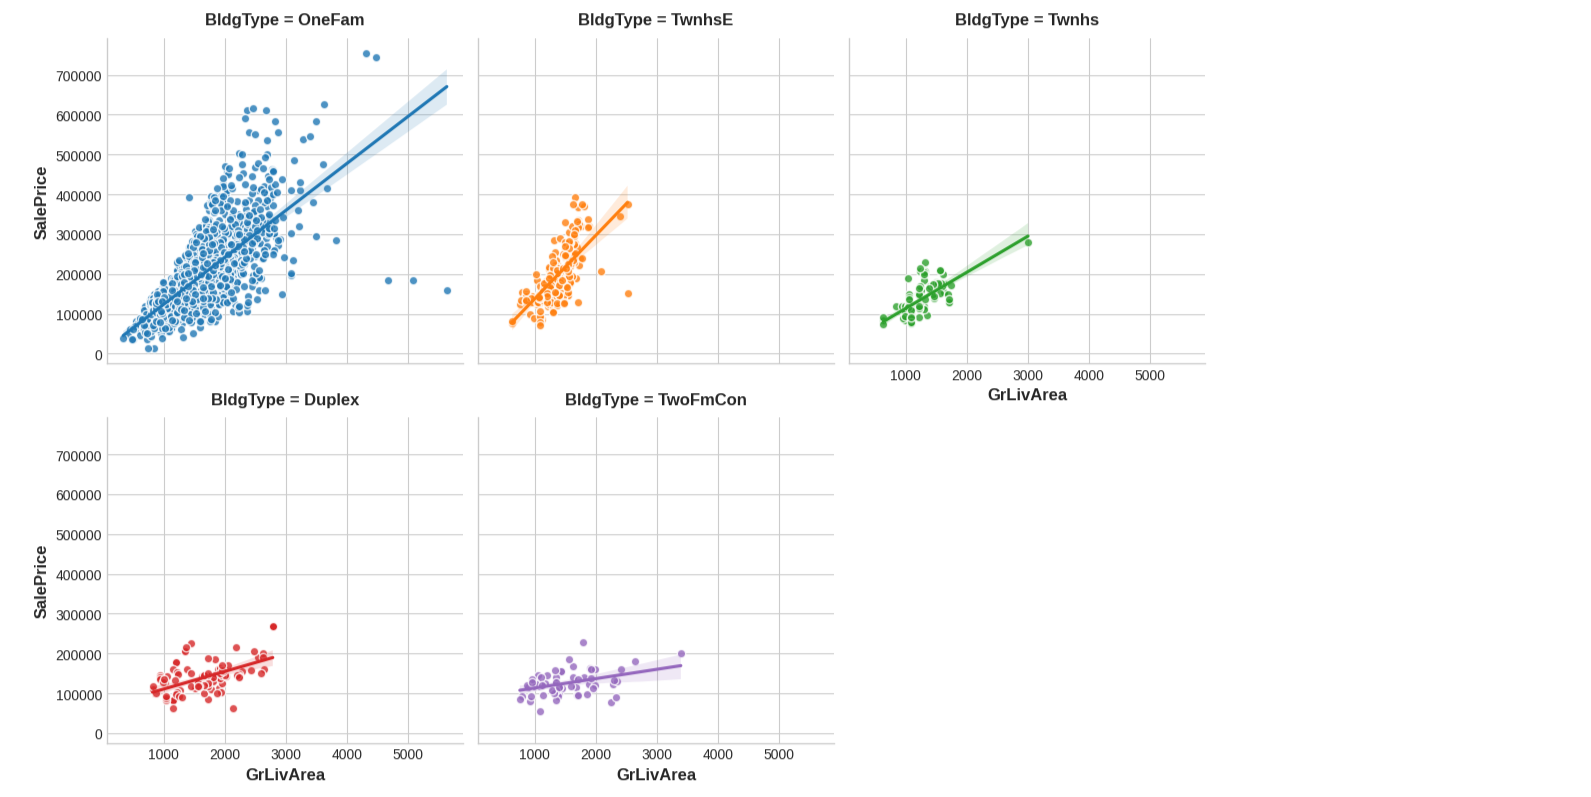

### Missing Values

If a value is missing becuase it doesn't exist (like the height of the oldest child of someone who doesn't have any children) then it doesn't make sense to try and guess what it might be. These values you probably do want to keep as NaN. On the other hand, if a value is missing because it wasn't recorded, then you can try to guess what it might have been based on the other values in that column and row. This is called imputation, and we'll learn how to do it next! :)

In [ ]:
tot_missing = X_t.isnull().sum().sum()

# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

In [ ]:
# get the number of missing data points per column
missing_values_count = nfl_data.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:10]

NameError: name 'nfl_data' is not defined

In [ ]:
total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

In [ ]:
# remove all the rows that contain a missing value
nfl_data.dropna()

###### First Approach

In [ ]:
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

###### Second Approach

In [ ]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

###### Third Approach(add new column that says if this row was missing)

In [ ]:
# Make copy to avoid changing original data (when imputing)
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

######How many columns in the training data have missing values?

In [ ]:
num_cols_with_missing = len([col for col in X_train.columns if X_train[col].isnull().any()])
print(num_cols_with_missing)

###### Number of missing values in each column of training data


In [ ]:
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

### Ordinal Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Make copy to avoid changing original data
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Apply ordinal encoder to each column with categorical data
ordinal_encoder = OrdinalEncoder()
label_X_train[object_cols] = ordinal_encoder.fit_transform(X_train[object_cols])
label_X_valid[object_cols] = ordinal_encoder.transform(X_valid[object_cols])

### One Hot Encoding

Best practice for Kaggle competitions: Use OneHotEncoder instead of get_dummies, as test data might contain unseen categories

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# Ensure all columns have string type
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)

In [ ]:
X = pd.get_dummies(train_data[features])

### Categorical Variables

Get number of unique entries in each column with categorical data


In [ ]:
object_nunique = list(map(lambda col: X_train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

[('Street', 2),
 ('Utilities', 2),
 ('CentralAir', 2),
 ('LandSlope', 3),..]

Count categorical columns with cardinality > 10


In [ ]:
high_cardinality_numcols = sum(label_X_train[col].nunique() > 10 for col in label_X_train[good_label_cols])

# Train Model

### Pipline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Preprocessing for numerical data
# numerical_transformer = SimpleImputer(strategy='constant')
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())  # Normalize numerical features
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

In [ ]:
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                                  cv=3,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()

# Create an empty dictionary to store results
results = {}

# Loop through the given n values and store the results
for n in range(50, 401, 50):  # 50, 100, 150, ..., 400
    results[n] = get_score(n)

n_estimators_best = min(results, key=results.get)

## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']
X = melbourne_data[melbourne_features]
X.describe() # mean, count, std

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

## Decision Tree Regressor(try different max_leaf_nodes)

In [ ]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

## Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

## Random Forest(different models)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

### XGBoost(Gradient Boosting)

In [ ]:
from xgboost import XGBRegressor

#my_model = XGBRegressor(n_estimators=500)
# my_model.fit(X_train, y_train)

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4) # jobs: cores
my_model.fit(X_train, y_train,
             early_stopping_rounds=5,
             eval_set=[(X_valid, y_valid)],
             verbose=False)

# Validation

## Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X)
mean_absolute_error(y, predictions)

# Submission

In [ ]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions}) # 2 columns
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")